1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
import pandas as pd
import numpy as np 


In [2]:
df = pd.read_csv("..\data\iris.csv")

In [7]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
plantitas_encoded = le.fit_transform(df["variety"])
y = plantitas_encoded

In [28]:
X = np.array(list(zip(df["sepal.length"],df["sepal.width"],df["petal.length"],df["petal.width"])))

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train) 
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))


0.9333333333333333
0.9666666666666667


In [32]:
predict = model.predict([[15.7,2.8,9.5,0.1]])
print(predict)

[2]


In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train) 
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))
predict = model.predict([[15.7,2.8,9.5,0.1]])
print(predict)

1.0
0.9833333333333333
[2]


([<matplotlib.axis.XTick at 0x2be798c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

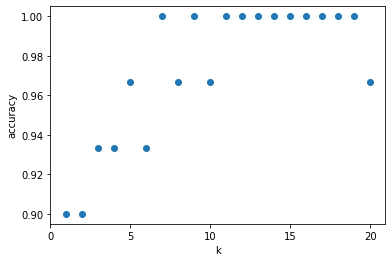

In [36]:
import matplotlib.pyplot as plt
k_range = range(1, 21)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train) 
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

predict = model.predict([[15.7,2.8,9.5,0.1]])
print(predict)

0.9166666666666666
1.0
[1]


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train) 
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

predict = model.predict([[15.7,2.8,9.5,0.1]])
print(predict)

0.95
0.95
[1]


In [38]:
df=df[df["variety"]!="Setosa"]

In [39]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
plantitas_encoded = le.fit_transform(df["variety"])
y = plantitas_encoded

In [41]:
X = np.array(list(zip(df["sepal.length"],df["sepal.width"],df["petal.length"],df["petal.width"])))

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train) 
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

predict = model.predict([[15.7,2.8,9.5,0.1]])
print(predict)

0.85
0.975
[1]


In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train) 
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))
predict = model.predict([[15.7,2.8,9.5,0.1]])
print(predict)

0.85
0.9875
[1]


([<matplotlib.axis.XTick at 0x2f6e3a88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

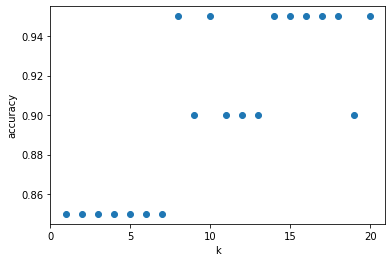

In [44]:
import matplotlib.pyplot as plt
k_range = range(1, 21)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train) 
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

predict = model.predict([[15.7,2.8,9.5,0.1]])
print(predict)

0.95
0.95
[1]


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train) 
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

predict = model.predict([[15.7,2.8,9.5,0.1]])
print(predict)

0.95
0.975
[1]


al haber etiquetas tendria que usarse un modelo de categorías pero sinceramente no se si es un bueno modelo o no 